<a href="https://colab.research.google.com/github/thomasbijuden/SEM-2-NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2

In [111]:
!pip install nltk spacy pandas matplotlib seaborn plotly --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [112]:
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from collections import Counter
import plotly.express as px
import plotly.io as pio

# Step 1: Download NLTK data
nltk.download('averaged_perceptron_tagger_eng') # Word Net
nltk.download('wordnet')
nltk.download('punkt_tab') # Punctuation
nltk.download('stopwords')




# --- Corpus  ---
texts = """
I had a nice day today.
We learned about nlp in class today.
The topic was very interesting and informative.
NLP is very useful for research
I enjoyed the class today.
I am very hungry after class.
I went to eat dinner after my class.
I had good food for dinner.
I am very satisfied after eating the food.
I am no longer hunger.

"""
# texts="""
# I love exploring natural language processing with Python!
# NLTK and SpaCy are both great tools for text processing.
# Text preprocessing is essential for NLP tasks.
# Tokenization splits text into smaller chunks.
# Stemming reduces words to their root forms, but lemmatization is more accurate.

# """


# --- NLTK Processing ---
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk_stopwords = set(stopwords.words('english'))

def nltk_tokenizing(text):
  nltk_tokens = nltk.word_tokenize(text.lower())
  nltk_tokens = [token for token in nltk_tokens
                 if token.isalpha() and token not in nltk_stopwords]
  return nltk_tokens

def nltk_stemming(text):
  return [stemmer.stem(token) for token in nltk_tokenizing(text)]

def nltk_lemming(text):
  return [lemmatizer.lemmatize(token) for token in nltk_tokenizing(text)]


def process_nltk(texts):

  stems = [nltk_stemming(text) for text in texts.split('\n')]
  stems= [token for stem in stems for token in stem] # flattening the array
  lems = [nltk_lemming(text) for text in texts.split('\n')]
  lems = [token for lem in lems for token in lem] # flattening the array

  return stems, lems




# --- SpaCy Processing ---
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

def spacy_tokenizing(text):
  doc = nlp(text.lower())
  spacy_tokens = [token for token in doc
                  if token.is_alpha and token.text not in spacy_stopwords]
  return spacy_tokens
def spacy_lemming(texts):
  spacy_lemmas = [token.lemma_ for text in texts.split('\n')
                for token in spacy_tokenizing(text)]
  return spacy_lemmas


# --- Tokens DataFrame ---
token_lists = [nltk_tokenizing(text) for text in texts.split('\n')]
token_list = [token for tokenlist in token_lists for token in tokenlist]
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
doc = nlp(texts.lower())
spacy_tokens_obj = [token for token in doc if token.is_alpha]
unique_tokens = sorted(list(set( token_list )))
results_list = []
for token in unique_tokens:
    results_list.append({
        "Token": token,
        "NLTK Stem": stemmer.stem(token),
        "NLTK Lemma": lemmatizer.lemmatize(token, get_wordnet_pos(token)),
        "SpaCy Lemma": next((t.lemma_ for t in spacy_tokens_obj if t.text == token), token)
    })
comparison_df = pd.DataFrame(results_list)
print("\n--- Unique Tokens and their eventual processing ---")
pd.set_option('display.max_rows', None)
print(comparison_df)





# --- Frequency Analysis ---
nltk_stems, nltk_lemmas = process_nltk(texts)
spacy_lemmas = spacy_lemming(texts)


freq_df = pd.DataFrame({
    'NLTK Stems': Counter(nltk_stems),
    'NLTK Lemmas': Counter(nltk_lemmas),
    'SpaCy Lemmas': Counter(spacy_lemmas)}).fillna(0).astype(int)


# --- Visualization ---

df_reset = freq_df.reset_index().rename(columns={'index': 'Token'})
df_melted = pd.melt(
    df_reset,
    id_vars='Token',
    value_vars=['NLTK Stems', 'NLTK Lemmas', 'SpaCy Lemmas'],
    var_name='Method',
    value_name='Count'
    )

# Create grouped bar chart
fig = px.bar(
    df_melted,
    x='Token',
    y='Count',
    color='Method',
    barmode='group',
    template="plotly_dark",
    title='Stemming/Lemmatization Comparison',
    labels={'Count': 'Frequency', 'Token': 'Token'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title='Processing Method',
    hovermode='x unified'
)

fig.show()


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Unique Tokens and their eventual processing ---
          Token NLTK Stem   NLTK Lemma  SpaCy Lemma
0         class     class        class        class
1           day       day          day          day
2        dinner    dinner       dinner       dinner
3           eat       eat          eat          eat
4        eating       eat          eat          eat
5       enjoyed     enjoy        enjoy        enjoy
6          food      food         food         food
7          good      good         good         good
8        hunger    hunger       hunger       hunger
9        hungry    hungri       hungry       hungry
10  informative    inform  informative  informative
11  interesting  interest     interest  interesting
12      learned     learn        learn        learn
13       longer    longer       longer         long
14         nice      nice         nice         nice
15          nlp       nlp          nlp          nlp
16     research  research     research     research
17    satis

# Question 3

## NER using BERT based model

In [113]:
# Install required libraries
!pip install transformers torch pandas matplotlib seaborn --quiet

In [114]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample sentences
sentences = [
    "Apple is looking to buy a U.K. startup for $1 billion.",
    "Elon Musk founded SpaceX in California.",
    "Microsoft announced Windows 11 at their Redmond campus.",
    "The WHO declared COVID-19 a pandemic in March 2020.",
    "President Biden will visit Paris next Monday.",
    "TensorFlow 2.0 was released by Google in September 2019.",
    "The Louvre Museum is located in Paris, France.",
    "Mark Zuckerberg graduated from Harvard University.",
    "The Dow Jones hit 35,000 points yesterday.",
    "Amazon Web Services launched new EC2 instances in Oregon."
]

# Load NER pipeline
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy='average' )

# Process sentences and extract entities
results = []
for sent in sentences:
    entities = ner_pipeline(sent)
    for entity in entities:
        results.append({
            "Sentence": sent,
            "Entity": entity['word'],
            "Type": entity['entity_group'],
            "Confidence": entity['score']
        })

# Create DataFrame
ner_df = pd.DataFrame(results)

# Display results
print("NER Results:")
pd.set_option('display.max_colwidth', None)
print(ner_df.to_string())

# --- Visualization: Entity Type Distribution ---


# Calculate value counts
entity_counts = ner_df['Type'].value_counts().reset_index()
entity_counts.columns = ['Entity_Type', 'Count']  # Rename columns

# Create Plotly bar plot
fig = px.bar(
    entity_counts,
    x='Entity_Type',
    y='Count',
    title='NER Entity Type Distribution',
    labels={'Entity_Type': 'Entity Types', 'Count': 'Count'},
    text_auto='.2s',
    template="plotly_dark")
fig.update_layout(
    width=1000,
    height=600,
    xaxis_tickangle=-45,
    showlegend=False    )
fig.show()


fig = px.box(
    ner_df, x='Type',
    y='Confidence',
    title='Entity Confidence Distribution by Type',
    template="plotly_dark")
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    xaxis_tickangle=-45
)
fig.show()



Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


NER Results:
                                                     Sentence               Entity  Type  Confidence
0      Apple is looking to buy a U.K. startup for $1 billion.                Apple   ORG    0.998412
1      Apple is looking to buy a U.K. startup for $1 billion.                U. K.   LOC    0.992683
2                     Elon Musk founded SpaceX in California.                 Elon   ORG    0.372360
3                     Elon Musk founded SpaceX in California.                 Musk   PER    0.566837
4                     Elon Musk founded SpaceX in California.               SpaceX   ORG    0.499725
5                     Elon Musk founded SpaceX in California.           California   LOC    0.999642
6     Microsoft announced Windows 11 at their Redmond campus.            Microsoft   ORG    0.998038
7     Microsoft announced Windows 11 at their Redmond campus.           Windows 11  MISC    0.998403
8     Microsoft announced Windows 11 at their Redmond campus.              Red

## Sentiment Analysis of real world data using Tranformer based model

In [115]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
sample_length = 10
sample = pd.concat([ df[:sample_length//2] ,df[-(sample_length//2 + 1):-1] ])

sample['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [116]:
import pandas as pd
import re
#import numpy as np
from bs4 import BeautifulSoup
def clean_review(text):
  # Remove HTML tags
  text = BeautifulSoup(text, "lxml").get_text()

  # Decode HTML entities
  text = re.sub(r'&amp;', '&', text)
  text = re.sub(r'&lt;', '<', text)
  text = re.sub(r'&gt;', '>', text)

  # Remove all tags
  text = re.sub(r'<[^>]+>', '', text)
  # text = re.sub(r'<\s*\/?\s*br\s*\/?\s*>', '', text, flags=re.IGNORECASE)

  # Remove special characters/URLs
  text = re.sub(r'http\S+', '', text)  # URLs
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Mentions
  text = re.sub(r'[^\w\s.,!?;:]', '', text)  # Special chars

  # Normalize whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  # Case normalization
  text = text.lower()

  return text

def get_cleaned_reviews(number=10):
  splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
  df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
  sample_length = number
  sample = pd.concat([ df[:sample_length//2] ,df[-(sample_length//2 + 1):-1] ])
  # print(sample['text'][0])
  # return sample
  sample['text'] = sample['text'].apply(clean_review)
  # print(review)
  return sample


In [118]:
from transformers import pipeline, AutoTokenizer
import pandas as pd
import seaborn as sns
import re
from bs4 import BeautifulSoup
import plotly.express as px


reviews = get_cleaned_reviews(20)['text'].to_list()
review_labels = get_cleaned_reviews(20)['label'].to_list()

# Load sentiment pipeline
tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')
sentiment_analyzer = pipeline("sentiment-analysis" ,
                              model='distilbert/distilbert-base-uncased-finetuned-sst-2-english',
                              tokenizer='distilbert/distilbert-base-uncased-finetuned-sst-2-english')

# Analyze sentiments
sentiment_results = []
i=0
for review in reviews:
  tokens = tokenizer.tokenize(review)
  if len(tokens) > 512:
    continue
  result = sentiment_analyzer(review)[0]
  sentiment_results.append({
      "Original Label": review_labels[i],
      "Sentiment": result['label'],
      "Confidence": round(result['score'], 4),
      "Review": review
    })
  i+=1

# Create DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Display results
print("\nSentiment Analysis Results:")
pd.set_option('display.max_colwidth', 50)
print(sentiment_df.to_string(justify='left'))


# Display score
count_correct_negative = len(
    sentiment_df[ (sentiment_df['Original Label'] == 0) & (sentiment_df['Sentiment'] == 'NEGATIVE') ])
total_negative = len(sentiment_df[sentiment_df['Original Label'] == 0])
count_correct_positive = len(
    sentiment_df[ (sentiment_df['Original Label'] == 1) & (sentiment_df['Sentiment'] == 'POSITIVE') ])
total_positive = len(sentiment_df[sentiment_df['Original Label'] == 1])

print("\n----ACCURACY SCORES")
print(f"Number of occurrences where review was correctly said negative: {count_correct_negative}")
print(f"Total number of negative reviews = {total_negative}")
print(f"Percentage accuracy: {((count_correct_negative / total_negative) * 100):.2f}%")
print(f"\n\nNumber of occurrences where review was correctly said positive: {count_correct_positive}")
print(f"Total number of negative reviews = {total_positive}")
print(f"Percentage accuracy: {((count_correct_positive / total_positive) * 100):.2f}%")


# Visualization: Sentiment Distribution
sentiment_counts = sentiment_df['Sentiment'].value_counts()
fig = px.pie(sentiment_df,
             names='Sentiment',
             title='Sentiment Distribution',
             color='Sentiment',
             template='plotly_dark')
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  pull=[0.1, 0] if len(sentiment_counts) == 2 else None,  # adds slight emphasis if only 2 categories
                  marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(
    title_x=0.5,  # Center title
    showlegend=False,
    height=500,
    width=800)
fig.show()

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (619 > 512). Running this sequence through the model will result in indexing errors



Sentiment Analysis Results:
    Original Label Sentiment  Confidence Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Question 4

Please run the next two lines in the following order:
1. Run line 1
2. Run line 2 restart session   
3. Run line 2 again restart session
4. Run the following lines

Steps 2 and 3 may need to be repeated multiple times until gensim is fully imported

In [119]:
!pip install gensim --quiet
!pip install --upgrade --force-reinstall numpy==1.23.5 gensim==4.3.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 20.8 MB

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install --force-reinstall numpy
!pip install --upgrade gensim


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.

ERROR: Operation cancelled by user
^C


In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.manifold import TSNE
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))


corpus= """
Machine learning is fascinating and powerful.
Deep learning requires neural networks with multiple layers.
Natural language processing uses word embeddings to represent text.
Word2Vec is a popular embedding technique developed by Google.
CBOW and Skip-gram are two training methods for word embeddings.
Recurrent neural networks handle sequential data like text.
Transformers have revolutionized NLP with attention mechanisms.
"""

# Preprocess the corpus
def preprocess_corpus(text):
    """Convert multi-line string into list of tokenized sentences"""
    # Normalize text: lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())

    # Tokenize sentences and words
    sentences = [word_tokenize(sentence) for sentence in text.split('\n') if sentence.strip()]
    sentences = [[word for word in sentence if word.isalpha() and word not in stopwords] for sentence in sentences]

    return sentences

# Preprocess the corpus
corpus = preprocess_corpus(corpus)

# Generate Word2Vec embeddings using Gensim
def train_word2vec(sentences, method='skipgram', vector_size=100, window=5, epochs=100):
    sg = 1 if method == 'skipgram' else 0  # Set training mode

    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=1,
        epochs=epochs
    )
    return model

# Train both models
skipgram_model = train_word2vec(corpus, method='skipgram')
cbow_model = train_word2vec(corpus, method='cbow')

# Identify semantically similar words using cosine similarity
def find_similar_words(model, word, topn=3):
    """Find top similar words using model's built-in similarity"""
    try:
        return model.wv.most_similar(word, topn=topn)
    except KeyError:
        return f"{word} not in vocabulary"

# Manual cosine similarity calculation
def word_cosine_similarity(model, word1, word2):
    """Calculate cosine similarity between two words manually"""
    try:
        vec1 = model.wv[word1].reshape(1, -1)
        vec2 = model.wv[word2].reshape(1, -1)
        return cosine_similarity(vec1, vec2)[0][0]
    except KeyError as e:
        return f"Word {e} not in vocabulary"

def find_similar_words_custom(model, word, topn=3):
  """Find top similar words using word_cosine_similarity"""
  similarity_list = [(word2, word_cosine_similarity(model, word, word2))
                    for word2 in model.wv.key_to_index if word2 != word]
  return sorted(similarity_list , key=lambda x:-x[1])[:topn]

def display_word_embeddings(model):
  tsne = TSNE(n_components=2, random_state=42, perplexity=2)
  words = list(skipgram_model.wv.key_to_index.keys())
  word_vectors = [model.wv[word] for word in words]
  word_vectors_stacked = np.vstack(word_vectors)
  vectors_2d = tsne.fit_transform(word_vectors_stacked)

  fig = px.scatter(x=vectors_2d[:, 0], y=vectors_2d[:, 1], text=words,
                   title=f'Word Embeddings of {"Skipgram model" if model.sg==1 else "CBOW model"}',
                   template='plotly_dark')
  fig.update_traces(textposition='top center')
  fig.show()


def pretty_print(target_word, topn=3):
  print(f"\n\nSkip-gram similar to '{target_word}':")
  print(50*'-')
  print("{:>30}{:>30}{:30}{:>30}".format("IN-Built"," "*15,"Custom function"," "*15))
  for wordscore1, wordscore2 in zip(find_similar_words(skipgram_model, target_word, topn=topn), find_similar_words_custom(skipgram_model, target_word, topn=topn)):
      print("{:>20}{:>20.4f}{:>20}{:>20.4f}".format(wordscore1[0], wordscore1[1],wordscore2[0], wordscore2[1]))


  print(f"\n\nC-BOW similar to '{target_word}':")
  print(50*'-')
  print("{:>30}{:>30}{:30}{:>30}".format("IN-Built"," "*15,"Custom function"," "*15))
  for wordscore1, wordscore2 in zip(find_similar_words(cbow_model, target_word, topn=topn),find_similar_words_custom(cbow_model, target_word, topn=topn)):
      print("{:>20}{:>20.4f}{:>20}{:>20.4f}".format(wordscore1[0], wordscore1[1],wordscore2[0], wordscore2[1]))


# Demonstration
if __name__ == "__main__":
  print("\nVocabulary size (Skip-gram):", len(skipgram_model.wv.key_to_index))
  print("Vocabulary:", list(skipgram_model.wv.key_to_index.keys()))

  # Top n Similar words to {target word}
  pretty_print('learning', topn=3)


  # Calculate direct cosine similarity with custom function
  word_pair = ("learning", "mechanisms")
  ans = word_cosine_similarity(skipgram_model, *word_pair)
  print(f"\n\n-----\nCosine similarity between '{word_pair[0]}' and '{word_pair[1]}': {ans:.4f}")

  display_word_embeddings(skipgram_model)
  display_word_embeddings(cbow_model)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Vocabulary size (Skip-gram): 38
Vocabulary: ['text', 'learning', 'embeddings', 'word', 'neural', 'networks', 'natural', 'represent', 'uses', 'processing', 'language', 'mechanisms', 'layers', 'attention', 'requires', 'deep', 'powerful', 'fascinating', 'multiple', 'popular', 'embedding', 'technique', 'nlp', 'revolutionized', 'transformers', 'like', 'data', 'sequential', 'handle', 'recurrent', 'methods', 'training', 'two', 'skipgram', 'cbow', 'google', 'developed', 'machine']


Skip-gram similar to 'learning':
--------------------------------------------------
                      IN-Built                              Custom function                                             
          sequential              0.2052          sequential              0.2052
                 nlp              0.2018                 nlp              0.2018
            multiple              0.1890            multiple              0.1890


C-BOW similar to 'learning':
----------------------------------------

# Question 5

## Traditional Models

In [2]:
!pip install pandas numpy matplotlib seaborn wordcloud scikit-learn nltk plotly --quiet

In [3]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Preprocessing data...
Performing EDA...


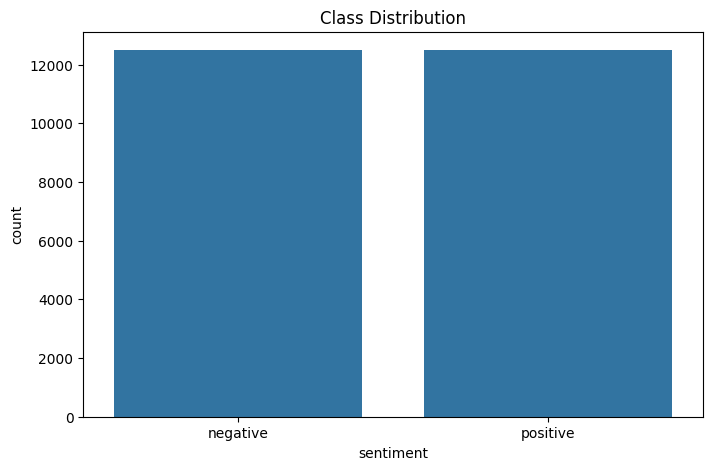

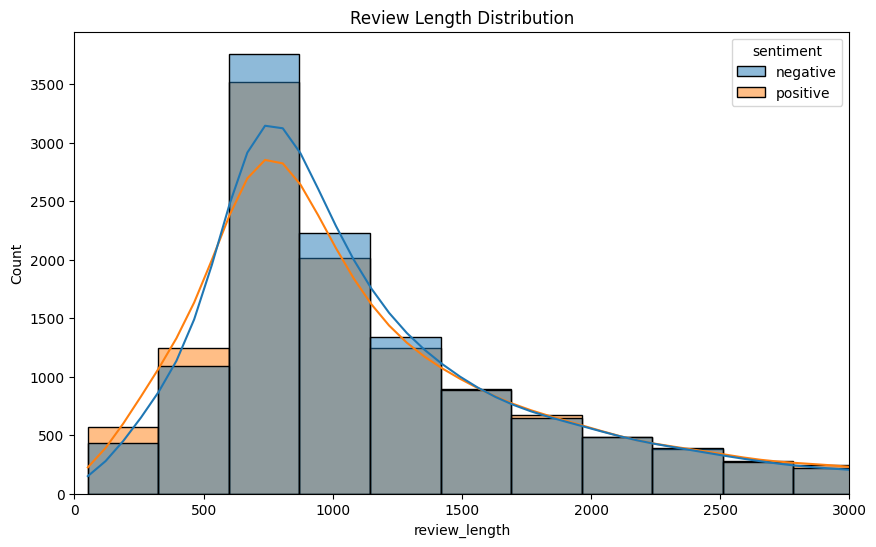

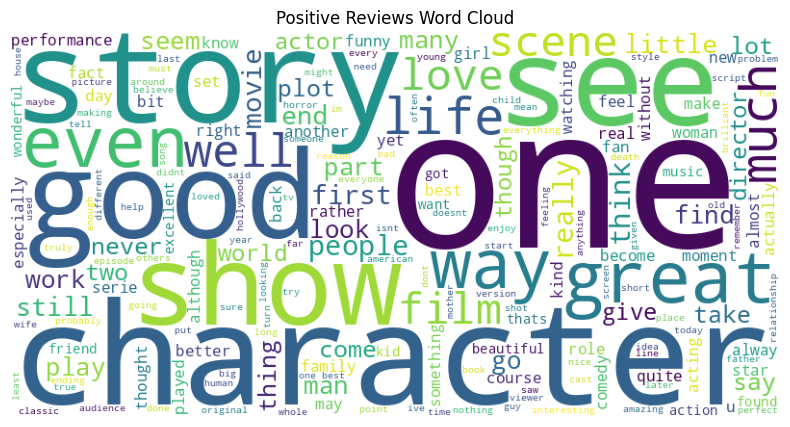

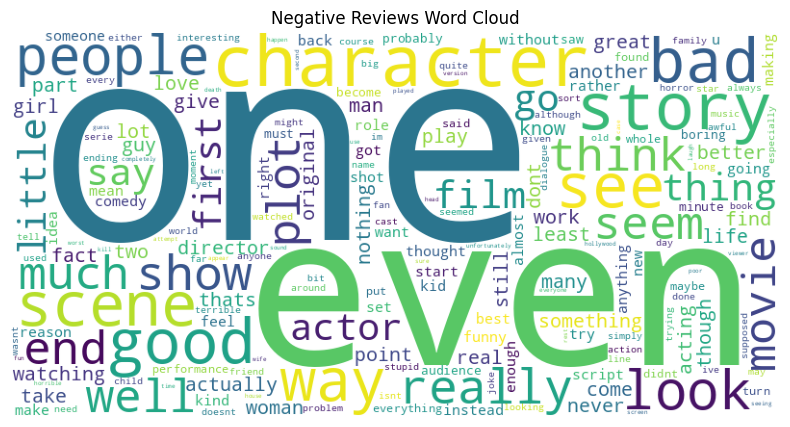

Training and evaluating models...

Logistic Regression with TfidfVectorizer Results:
Accuracy: 0.8834
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2500
           1       0.87      0.90      0.89      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Confusion Matrix:
[[2169  331]
 [ 252 2248]]



Naive Bayes with TfidfVectorizer Results:
Accuracy: 0.8528
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2500
           1       0.86      0.84      0.85      2500

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Confusion Matrix:
[[2153  347]
 [ 389 2111]]



SVM with TfidfVectorizer Results:
Accuracy: 0.8804
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2500
           1       0.87      0.89      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Confusion Matrix:
[[2177  323]
 [ 275 2225]]



Model Comparison:
Logistic Regression+tfidf: Accuracy = 0.8834
Naive Bayes+tfidf: Accuracy = 0.8528
SVM+tfidf: Accuracy = 0.8804
Training and evaluating models...

Logistic Regression with CountfVectorizer Results:
Accuracy: 0.8558
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2500
           1       0.85      0.87      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

Confusion Matrix:
[[2115  385]
 [ 336 2164]]



Naive Bayes with CountfVectorizer Results:
Accuracy: 0.8434
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2500
           1       0.85      0.83      0.84      2500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

Confusion Matrix:
[[2139  361]
 [ 422 2078]]



SVM with CountfVectorizer Results:
Accuracy: 0.8270
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2500
           1       0.83      0.83      0.83      2500

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

Confusion Matrix:
[[2062  438]
 [ 427 2073]]



Model Comparison:
Logistic Regression+countvec: Accuracy = 0.8558
Naive Bayes+countvec: Accuracy = 0.8434
SVM+countvec: Accuracy = 0.8270


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])

# Download required NLTK resources
nltk.download(['stopwords', 'wordnet', 'omw-1.4'])

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stop_words.update(['movie', 'film', 'watch', 'seen', 'time', 'make', 'made'])

lemmatizer = WordNetLemmatizer()

import plotly.graph_objects as go
import numpy as np

def plot_confusion_matrix(confusion_matrix, classes=["NEGATIVE" , "POSITIVE"], title='Confusion Matrix'):

    # Normalize the confusion matrix for better visualization
    cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Create the figure
    fig = go.Figure(data=go.Heatmap(
        z=cm_normalized,
        x=classes,
        y=classes,
        colorscale='Blues',
        colorbar=dict(title='Percentage'),
        hoverongaps=False,
        hoverinfo='all',
        # text=confusion_matrix,
        texttemplate="%{text}<br>%{z:.1%}",
    ))

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title='Predicted label',
        yaxis_title='True label',
        autosize=False,
        width=600,
        height=600,
        yaxis_autorange='reversed'
    )
    annotations = []
    for i, row in enumerate(confusion_matrix):
        for j, value in enumerate(row):
            annotations.append(
                dict(
                    x=classes[j],
                    y=classes[i],
                    text=str(value),
                    font=dict(color='black' if cm_normalized[i, j] < 0.5 else 'white'),
                    showarrow=False
                )
            )
    fig.update_layout(annotations=annotations)

    fig.show()



def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords and tokenize and lemmatize
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

def perform_eda(df):
    """Perform exploratory data analysis"""
    # Class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment', data=df)
    plt.title('Class Distribution')
    plt.show()

    # Review length analysis
    df['review_length'] = df['review'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
    plt.title('Review Length Distribution')
    plt.xlim(0, 3000)
    plt.show()

    # Word clouds
    for sentiment in ['positive', 'negative']:
        text = ' '.join(df[df['sentiment'] == sentiment]['clean_review'])
        if text: # Check if there are any words left after preprocessing
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud)
            plt.title(f'{sentiment.capitalize()} Reviews Word Cloud')
            plt.axis('off')
            plt.show()
        else:
            print(f"No words left for {sentiment} reviews after preprocessing. Skipping word cloud.")


def train_evaluate_models_tfidf(X_train, X_test, y_train, y_test):
    """Train and evaluate multiple classifiers"""
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, C=1.0),
        'Naive Bayes': MultinomialNB(),
        'SVM': LinearSVC(max_iter=1000, random_state=42)
    }


    results = {}

    for name, clf in classifiers.items():
        # Create pipeline with TF-IDF and classifier
        model = make_pipeline(TfidfVectorizer(max_features=10000), clf)

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'report': report
        }

        # Print results
        print(f"\n{name} with TfidfVectorizer Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(cm)
        plot_confusion_matrix(cm, title=f'{name}+tfidf')

    return results

def train_evaluate_models_countVec(X_train, X_test, y_train, y_test):
    """Train and evaluate multiple classifiers"""
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, C=1.0),
        'Naive Bayes': MultinomialNB(),
        'SVM': LinearSVC(max_iter=1000, random_state=42)
    }


    results = {}

    for name, clf in classifiers.items():
        # Create pipeline with TF-IDF and classifier
        model = make_pipeline(CountVectorizer(max_features=5000), clf)

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'report': report
        }

        # Print results
        print(f"\n{name} with CountfVectorizer Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(cm)
        plot_confusion_matrix(cm, title=f'{name}+countVec')

    return results


df.columns = ['review' , 'sentiment']
df['sentiment'] = df['sentiment'].map({1:'positive', 0:'negative'}) # Apply mapping to the 'sentiment' column
# if df is None:
#     return

# Preprocessing
print("Preprocessing data...")
df['clean_review'] = df['review'].apply(preprocess_text)

# Perform EDA
print("Performing EDA...")
perform_eda(df)

# Prepare data for modeling
X = df['clean_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train and evaluate models_tfidf
print("Training and evaluating models...")
results1 = train_evaluate_models_tfidf(X_train, X_test, y_train, y_test)

# Compare model performance
print("\nModel Comparison:")
for name, res in results1.items():
    print(f"{name}+tfidf: Accuracy = {res['accuracy']:.4f}")

# Train and evaluate models_countVec
print("Training and evaluating models...")
results2 = train_evaluate_models_countVec(X_train, X_test, y_train, y_test)

# Compare model performance
print("\nModel Comparison:")
for name, res in results2.items():
    print(f"{name}+countvec: Accuracy = {res['accuracy']:.4f}")


In [5]:
# Ranking pipelines based on accuracy
merged_df = pd.merge(pd.DataFrame(results1).T , pd.DataFrame(results2).T, on='accuracy', how='outer', suffixes=('1', '2'))
merged_df['model'] = merged_df['model1'].combine_first(merged_df['model2'])
merged_df = merged_df.sort_values('accuracy', ascending=False)
print(merged_df[['model', 'accuracy']])

                                               model accuracy
5  (TfidfVectorizer(max_features=10000), Logistic...   0.8834
4  (TfidfVectorizer(max_features=10000), LinearSV...   0.8804
3  (CountVectorizer(max_features=5000), LogisticR...   0.8558
2  (TfidfVectorizer(max_features=10000), Multinom...   0.8528
1  (CountVectorizer(max_features=5000), Multinomi...   0.8434
0  (CountVectorizer(max_features=5000), LinearSVC...    0.827


In [7]:
# Making the ranking easier to read and then plot
model = [ str(list(merged_df['model'][i])[0])[:4] + ":" + str(list(merged_df['model'][i])[1])[:10] for i in range(len(merged_df))]
accuracy = merged_df['accuracy'].to_list()
print_df = pd.DataFrame({'model':model, 'accuracy':accuracy})
print_df

,model,accuracy
0,Coun:LinearSVC(,0.8834
1,Coun:Multinomia,0.8804
2,Tfid:Multinomia,0.8558
3,Coun:LogisticRe,0.8528
4,Tfid:LinearSVC(,0.8434
5,Tfid:LogisticRe,0.8270


In [8]:
import plotly.express as px
fig = px.bar(
    (print_df),
    x='model',
    y='accuracy',
    title='accuracy plot',
    text_auto='.2s',
    template="plotly_dark")
fig.update_layout(
    width=1000,
    height=600,
    xaxis_tickangle=-45,
    showlegend=False    )
fig.show()

## DistillBERT based model

In [ ]:
!pip install pandas transformers scikit-learn torch numpy --quiet

In [ ]:
sample_length = 1000

import pandas as pd
splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
sample = pd.concat([ df[:sample_length//2] ,df[-(sample_length//2 + 1):-1] ])


from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report
import torch
import numpy as np
import concurrent.futures
import time


# Configuration
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"
BATCH_SIZE = 512  # Optimised for GPU processing
MAX_LENGTH = 128  # Truncate to this length for speed
NUM_WORKERS = 4 if torch.cuda.is_available() else 1

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)
model.eval()

# Apply quantization for CPU speedup
if device.type == "cpu":
    model = torch.quantization.quantize_dynamic(
        model, {torch.nn.Linear}, dtype=torch.qint8
    )
    print("Applied dynamic quantization for CPU acceleration")

def predict_batch(texts):
    """Process a batch of texts through the model"""
    # Tokenize with truncation and padding
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    ).to(device)

    # Run model inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1).cpu().numpy()

    # Format results
    results = []
    for prob in probs:
        sentiment = "POSITIVE" if np.argmax(prob) == 1 else "NEGATIVE"
        confidence = prob[1] if sentiment == "POSITIVE" else prob[0]
        results.append({"sentiment": sentiment, "confidence": round(float(confidence), 4)})

    return results

def analyze_reviews(reviews):
    """Process large batches of reviews with parallel execution"""
    start_time = time.time()

    # Split reviews into batches
    batches = [reviews[i:i+BATCH_SIZE] for i in range(0, len(reviews), BATCH_SIZE)]
    total_batches = len(batches)

    # Process batches in parallel
    with concurrent.futures.ThreadPoolExecutor(max_workers=NUM_WORKERS) as executor:
        futures = [executor.submit(predict_batch, batch) for batch in batches]

        results = []
        for future in concurrent.futures.as_completed(futures):
            results.extend(future.result())

    # Calculate performance metrics
    processing_time = time.time() - start_time
    positive_count = sum(1 for r in results if r["sentiment"] == "POSITIVE")

    return {
        "total_reviews": len(reviews),
        "processing_time": round(processing_time, 2),
        "reviews_per_second": round(len(reviews) / processing_time, 1),
        "positive_percentage": round(positive_count / len(reviews) * 100, 1),
        "results": results
    }



# Example usage
if __name__ == "__main__":

    reviews = sample['text'].to_list()
    print(f"Processing {len(reviews)} reviews...")

    # Run analysis
    results = analyze_reviews(reviews)

    # Print summary
    print(f"\nProcessing Summary:")
    print(f"- Total reviews: {results['total_reviews']}")
    print(f"- Processing time: {results['processing_time']} seconds")
    print(f"- Speed: {results['reviews_per_second']} reviews/second")
    print(f"- Positive reviews: {results['positive_percentage']}%")

    # Classification Report

    class_report = classification_report(sample['label'],
    pd.DataFrame(results['results'])['sentiment'].map({"POSITIVE":1,"NEGATIVE":0})
    )
    print(class_report)

    # classification_report(df['label'] , results[])

    # Show sample results
    print("\nSample Predictions:")
    for i in range(0, min(5, len(reviews))):#, len(reviews)//5):
        print(f"Review {i}: {reviews[i][:60]}...")
        print(f"  Sentiment: {results['results'][i]['sentiment']}")
        print(f"  Confidence: {results['results'][i]['confidence']:.1%}")

Using device: cpu
Applied dynamic quantization for CPU acceleration
Processing 1000 reviews...

Processing Summary:
- Total reviews: 1000
- Processing time: 223.93 seconds
- Speed: 4.5 reviews/second
- Positive reviews: 49.4%
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       500
           1       0.80      0.79      0.79       500

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000


Sample Predictions:
Review 0: I rented I AM CURIOUS-YELLOW from my video store because of ...
  Sentiment: NEGATIVE
  Confidence: 95.8%
Review 1: "I Am Curious: Yellow" is a risible and pretentious steaming...
  Sentiment: NEGATIVE
  Confidence: 99.9%
Review 2: If only to avoid making this type of film in the future. Thi...
  Sentiment: NEGATIVE
  Confidence: 99.6%
Review 3: This film was probably inspired by Godard's Masculin, fémini...
  Se

## ROBERTA TIME CONSUMING

In [ ]:
!pip install pandas numpy transformers torch --quiet

In [ ]:
sample_length = 2 # INPUT SIZE OF SAMPLE

import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
def clean_review(text):
  # Remove HTML tags
  text = BeautifulSoup(text, "lxml").get_text()

  # Decode HTML entities
  text = re.sub(r'&amp;', '&', text)
  text = re.sub(r'&lt;', '<', text)
  text = re.sub(r'&gt;', '>', text)

  # Remove all tags
  text = re.sub(r'<[^>]+>', '', text)
  # text = re.sub(r'<\s*\/?\s*br\s*\/?\s*>', '', text, flags=re.IGNORECASE)

  # Remove special characters/URLs
  text = re.sub(r'http\S+', '', text)  # URLs
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Mentions
  text = re.sub(r'[^\w\s.,!?;:]', '', text)  # Special chars

  # Normalize whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  # Case normalization
  text = text.lower()

  return text

def get_cleaned_reviews(number=10):
  splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
  df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
  sample_length = number
  sample = pd.concat([ df[:sample_length//2] ,df[-(sample_length//2 + 1):-1] ])
  # print(sample['text'][0])
  # return sample
  sample['text'] = sample['text'].apply(clean_review)
  # print(review)
  return sample

sample = get_cleaned_reviews(sample_length)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load RoBERTa model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
model = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english").to(device)

def analyze_sentiment_roberta(review, batch_size=8, max_chunk_length=500, overlap=50):
    """
    Analyze sentiment of long movie reviews using RoBERTa with chunking strategy

    Args:
        review (str): Movie review text
        batch_size (int): Number of chunks processed simultaneously
        max_chunk_length (int): Token limit per chunk (default 500)
        overlap (int): Token overlap between chunks (default 50)

    Returns:
        dict: Predicted label and confidence score
    """
    # Tokenize without truncation
    tokens = tokenizer.tokenize(review)

    if not tokens:
        return {"label": "NEUTRAL", "confidence": 1.0}

    # Split into chunks with overlap
    chunks = []
    start_idx = 0
    while start_idx < len(tokens):
        end_idx = start_idx + max_chunk_length
        chunk_tokens = tokens[start_idx:end_idx]

        # Convert to input IDs with special tokens
        input_ids = tokenizer.convert_tokens_to_ids(
            [tokenizer.cls_token] +
            chunk_tokens +
            [tokenizer.sep_token]
        )
        chunks.append(input_ids)

        # Break if at end, else move with overlap
        if end_idx >= len(tokens):
            break
        start_idx = end_idx - overlap

    # Process chunks in batches
    all_logits = []
    for i in range(0, len(chunks), batch_size):
        batch_chunks = chunks[i:i+batch_size]

        # Pad sequences to max length in batch
        max_len = min(max(len(chunk) for chunk in batch_chunks), tokenizer.model_max_length)
        padded_inputs = []
        attention_masks = []

        for chunk in batch_chunks:
            # Truncate if needed (shouldn't occur with proper max_chunk_length)
            if len(chunk) > max_len:
                chunk = chunk[:max_len]

            # Pad to max_len
            padding = [tokenizer.pad_token_id] * (max_len - len(chunk))
            padded_inputs.append(chunk + padding)
            attention_masks.append([1] * len(chunk) + [0] * len(padding))

        # Convert to tensors
        input_tensor = torch.tensor(padded_inputs).to(device)
        mask_tensor = torch.tensor(attention_masks).to(device)

        # Run model
        with torch.no_grad():
            outputs = model(input_tensor, attention_mask=mask_tensor)

        all_logits.append(outputs.logits.cpu())

    # Combine results using logit averaging
    all_logits = torch.cat(all_logits, dim=0)
    avg_logits = torch.mean(all_logits, dim=0)
    probs = softmax(avg_logits, dim=0)

    # Convert to probabilities
    positive_prob = probs[1].item()
    negative_prob = probs[0].item()

    # Determine final sentiment
    sentiment = "POSITIVE" if positive_prob >= 0.5 else "NEGATIVE"
    confidence = positive_prob if sentiment == "POSITIVE" else negative_prob

    return {
        "label": sentiment,
        "confidence": round(confidence, 4),
        "positive_prob": round(positive_prob, 4),
        "negative_prob": round(negative_prob, 4)
    }

# Example usage
if __name__ == "__main__":
  out = []
  i = 0

  for long_review,label in zip(sample['text'] , sample['label']):
    result = analyze_sentiment_roberta(long_review)
    out.append(result)
    if i%1==0:

      print(f"Sentiment: {result['label']} (Confidence: {result['confidence']:.2%}) (Actual Label: {label})")
      print(f"Positive probability: {result['positive_prob']:.4f}")
      print(f"Negative probability: {result['negative_prob']:.4f}")
    i+=1

Token indices sequence length is longer than the specified maximum sequence length for this model (939 > 512). Running this sequence through the model will result in indexing errors


Sentiment: POSITIVE (Confidence: 98.21%) (Actual Label: 0)
Positive probability: 0.9821
Negative probability: 0.0179
Sentiment: POSITIVE (Confidence: 99.81%) (Actual Label: 1)
Positive probability: 0.9981
Negative probability: 0.0019
